# Building a Euribor Libor Dual Curve and Valuing a Swap

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-interest-rate-swap-price-dual-bootstrapping-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
#  FINANCEPY BETA Version 0.350 - This build: 30 Apr 2024 at 21:20 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
set_date_format(DateFormatTypes.UK_LONG)

In [4]:
value_dt = Date(30, 11, 2018)

## Define IR Swap

Define the swap characteristics

In [5]:
start_dt = Date(27, 12, 2017)
maturity_dt = Date(27, 12, 2067)
notional = 10 * ONE_MILLION
swap_type = SwapTypes.RECEIVE

Set up the fixed leg

In [6]:
fixed_rate = 0.0150
fixed_dcc_type = DayCountTypes.THIRTY_360_BOND
fixed_freq_type = FrequencyTypes.ANNUAL

Set up the floating leg

In [7]:
float_spread = 0.0
principal = 0.0
float_dcc_type = DayCountTypes.ACT_360
float_freq_type = FrequencyTypes.SEMI_ANNUAL

In [8]:
offMarketSwap = IborSwap(start_dt, maturity_dt, swap_type, 
                            fixed_rate, fixed_freq_type, fixed_dcc_type,
                            notional,
                            float_spread, float_freq_type, float_dcc_type, 
                            CalendarTypes.TARGET)

In [9]:
interp_type = InterpTypes.LINEAR_ZERO_RATES

## Build a USD Libor Single Curve

In [10]:
depos = []; fras = []; swaps = []

spot_days = 0
settle_dt = value_dt.add_weekdays(spot_days)
depoDCCType = DayCountTypes.ACT_360
depo = IborDeposit(settle_dt, "6M", -0.2510/100.0, depoDCCType); depos.append(depo)
fraDCCType = DayCountTypes.ACT_360

fra = IborFRA(settle_dt.add_tenor("1M"), "6M", -0.2450/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("2M"), "6M", -0.2435/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("3M"), "6M", -0.2400/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("4M"), "6M", -0.2360/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("5M"), "6M", -0.2285/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("6M"), "6M", -0.2230/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("7M"), "6M", -0.2110/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("8M"), "6M", -0.1990/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("9M"), "6M", -0.1850/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("10M"), "6M", -0.1680/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("11M"), "6M", -0.1510/100.0, fraDCCType); fras.append(fra)
fra = IborFRA(settle_dt.add_tenor("12M"), "6M", -0.1360/100.0, fraDCCType); fras.append(fra)

swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.THIRTY_360_BOND
fixed_freq_type = FrequencyTypes.ANNUAL

swap = IborSwap(settle_dt, "2Y", swap_type, -0.1525/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "3Y", swap_type, -0.0185/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "4Y", swap_type, 0.1315/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "5Y", swap_type, 0.2745/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "6Y", swap_type, 0.4135/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "7Y", swap_type, 0.5439/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "8Y", swap_type, 0.6652/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "9Y", swap_type, 0.7784/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "10Y", swap_type, 0.8799/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "11Y", swap_type, 0.9715/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "12Y", swap_type, 1.0517/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "15Y", swap_type, 1.2369/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "20Y", swap_type, 1.3965/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "25Y", swap_type, 1.4472/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "30Y", swap_type, 1.4585/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "35Y", swap_type, 1.4595/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "40Y", swap_type, 1.4535/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "45Y", swap_type, 1.4410/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = IborSwap(settle_dt, "50Y", swap_type, 1.4335/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

iborSingleCurve = IborSingleCurve(value_dt, depos, fras, swaps, interp_type)

In [11]:
iborDepos = depos.copy()
iborFras = fras.copy()
ibor_swaps = swaps.copy()

In [12]:
iborCurve = IborSingleCurve(value_dt, iborDepos, iborFras, ibor_swaps, interp_type)

In [13]:
ibor_swaps[0].print_fixed_leg_pv()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
COUPON (%): -0.1525
FREQUENCY: FrequencyTypes.ANNUAL
DAY COUNT: DayCountTypes.THIRTY_360_BOND

PAYMENTS VALUATION:
+---------+-------------+----------+---------+----------+--------+----------+----------+
| PAY_NUM |    PAY_dt   | NOTIONAL |   RATE  |   PMNT   |   DF   |    PV    |  CUM_PV  |
+---------+-------------+----------+---------+----------+--------+----------+----------+
|    1    | 02-DEC-2019 | 1000000  | -0.1525 | -1533.47 | 1.0024 | -1537.17 | -1537.17 |
|    2    | 30-NOV-2020 | 1000000  | -0.1525 | -1516.53 | 1.0031 | -1521.17 | -3058.34 |
+---------+-------------+----------+---------+----------+--------+----------+----------+


In [14]:
ibor_swaps[0].float_leg.print_valuation()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
SPREAD (BPS): 0.0
FREQUENCY: FrequencyTypes.QUARTERLY
DAY COUNT: DayCountTypes.THIRTY_E_360

PAYMENTS VALUATION:
+---------+-------------+----------+---------+---------+--------+---------+----------+
| PAY_NUM |    PAY_dt   | NOTIONAL |   IBOR  |   PMNT  |   DF   |    PV   |  CUM_PV  |
+---------+-------------+----------+---------+---------+--------+---------+----------+
|    1    | 28-FEB-2019 | 1000000  | -0.2568 |  -627.7 | 1.0006 | -628.09 | -628.09  |
|    2    | 30-MAY-2019 | 1000000  | -0.2483 | -634.67 | 1.0013 | -635.47 | -1263.57 |
|    3    | 30-AUG-2019 | 1000000  |  -0.234 |  -585.1 | 1.0018 | -586.18 | -1849.75 |
|    4    | 02-DEC-2019 | 1000000  | -0.2197 | -561.41 | 1.0024 | -562.77 | -2412.51 |
|    5    | 02-MAR-2020 | 1000000  | -0.1541 | -385.18 | 1.0028 | -386.26 | -2798.78 |
|    6    | 01-JUN-2020 | 1000000  | -0.1193 | -294.99 | 1.0031 |  -295.9 | -3094.67 |
|    7    | 31-AUG-2020 | 1000000  | -0.0193 |  -47.6

## Swap Valuation

In [15]:
vBloomberg = 388147

In [16]:
v1 = offMarketSwap.value(value_dt, iborCurve, iborCurve, -0.268/100.0)

In [17]:
print("Single Curve Value: %9.2f  BBG Value:%9.2f"% (v1, vBloomberg))

Single Curve Value: 307023.12  BBG Value:388147.00


In [18]:
print("Error in bps: %9.6f"% ((v1-vBloomberg)/notional*10000))

Error in bps: -81.123885


In Bloomberg, this swap has a value of 388,147.49 - why the difference - BBG uses a Dual Curve.

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [19]:
depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 0
settle_dt = value_dt.add_weekdays(spot_days)
depo = IborDeposit(settle_dt, "1D", -0.3490/100.0, depoDCCType); depos.append(depo)

fras = []

swaps = []
swap_type = SwapTypes.PAY
fixed_dcc_type = DayCountTypes.ACT_365F
fixed_freq_type = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settle_dt, "2W", swap_type, -0.3600/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "1M", swap_type, -0.3560/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "2M", swap_type, -0.3570/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3M", swap_type, -0.3580/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "4M", swap_type, -0.3575/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "5M", swap_type, -0.3578/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "6M", swap_type, -0.3580/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "7M", swap_type, -0.3600/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "8M", swap_type, -0.3575/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "9M", swap_type, -0.3569/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "10M", swap_type, -0.3553/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "11M", swap_type, -0.3534/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "12M", swap_type, -0.3496/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "18M", swap_type, -0.3173/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

swap = OIS(settle_dt, "2Y", swap_type, -0.2671/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "30M", swap_type, -0.2070/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "3Y", swap_type, -0.1410/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "4Y", swap_type, -0.0060/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "5Y", swap_type, 0.1285/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "6Y", swap_type, 0.2590/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "7Y", swap_type, 0.3830/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "8Y", swap_type, 0.5020/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "9Y", swap_type, 0.6140/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "10Y", swap_type, 0.7160/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "11Y", swap_type, 0.8070/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "12Y", swap_type, 0.8890/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "15Y", swap_type, 1.0790/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "20Y", swap_type, 1.2460/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "25Y", swap_type, 1.3055/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "30Y", swap_type, 1.3270/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "35Y", swap_type, 1.3315/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "40Y", swap_type, 1.3300/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)
swap = OIS(settle_dt, "50Y", swap_type, 1.3270/100.0, fixed_freq_type, fixed_dcc_type); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [20]:
oisCurve = OISCurve(value_dt, oisDepos, oisFras, oisSwaps, interp_type)

In [21]:
oisCurve._dfs

array([1.        , 1.00002908, 1.0001381 , 1.00030245, 1.00059699,
       1.00088352, 1.00119636, 1.00148241, 1.00177844, 1.00210524,
       1.00237591, 1.00267656, 1.00296799, 1.00324434, 1.00352756,
       1.00479319, 1.00537476, 1.00519777, 1.0042454 , 1.00022628,
       0.99354061, 0.98439996, 0.97322618, 0.96011131, 0.94541594,
       0.92964063, 0.91333576, 0.89652635, 0.84644971, 0.7726468 ,
       0.71365728, 0.66352105, 0.61990978, 0.58064011, 0.50974821])

## Building the Dual Curve

In [22]:
iborSingleCurve = IborSingleCurve(value_dt, iborDepos, iborFras, ibor_swaps, interp_type)

In [23]:
iborDualCurve = IborDualCurve(value_dt, oisCurve, iborDepos, iborFras, ibor_swaps, interp_type)

In [24]:
v2 = offMarketSwap.value(value_dt, oisCurve, iborDualCurve, -0.268/100.0)

In [25]:
print("Two Curve Value: %9.2f  BBG Value:%9.2f"% (v2, vBloomberg))

Two Curve Value: 310881.68  BBG Value:388147.00


In [26]:
print("Error in bps: %9.6f"% ((v2-vBloomberg)/notional*10000))

Error in bps: -77.265324


In [27]:
offMarketSwap.swap_rate(value_dt, iborDualCurve )*100

1.395699895545544

## Single vs Dual Curve

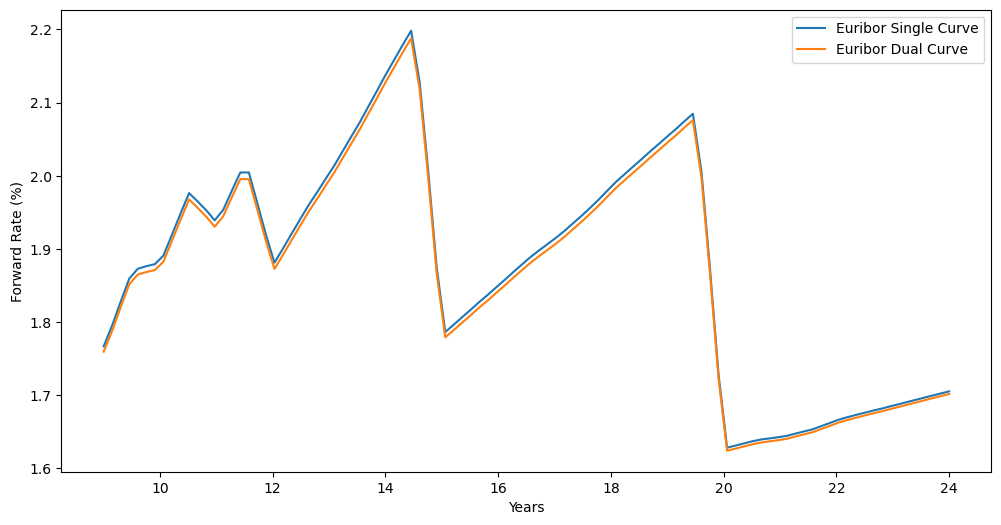

In [28]:
years = np.linspace(9, 24, 100)
dates = value_dt.add_years(years)

iborSingleCurveFwds = iborSingleCurve.fwd_rate(dates, "6M")    
iborDualCurveFwds = iborDualCurve.fwd_rate(dates, "6M")

plt.figure(figsize=(12,6))
plt.plot(years, iborSingleCurveFwds*100.0, label="Euribor Single Curve")
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Forward Rate (%)")
plt.legend();

I calculate the difference between the two curves.

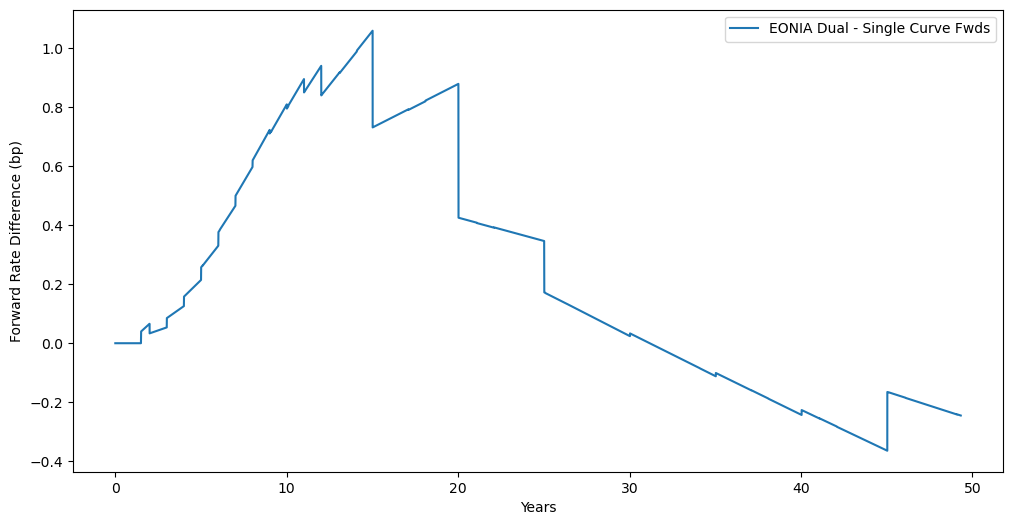

In [29]:
dayMax = 50*360
years = np.linspace(0, dayMax/365, dayMax)
dates = value_dt.add_years(years)

liborSingleCurveFwds = iborSingleCurve.fwd(dates)    
liborDualCurveFwds = iborDualCurve.fwd(dates)

diff = liborSingleCurveFwds - liborDualCurveFwds

plt.figure(figsize=(12,6))
plt.plot(years, diff*10000.0, label="EONIA Dual - Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("Forward Rate Difference (bp)")
plt.legend();

Copyright (c) Dominic O'Kane 2020